In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [5]:
#It is clear from the above described data that, Albumin_and_Globulin_Ratio columns has some missing rows.**
#As Albumin_and_Globulin_Ratio count is 579, where as other columns rows are 583.
print( "Albumin_and_Globulin_Ratio: ", df['Albumin_and_Globulin_Ratio'].isna().sum() )
print("-----------------------------------------------------")
print( "From entire dataset: ", df.isna().sum() )

Albumin_and_Globulin_Ratio:  4
-----------------------------------------------------
From entire dataset:  Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


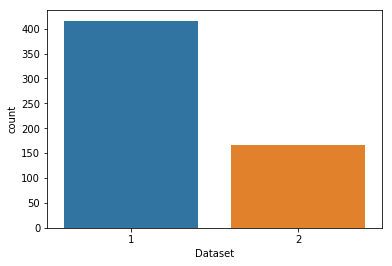

In [6]:
sns.countplot(data=df, x='Dataset')

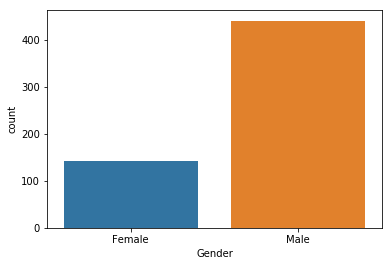

In [7]:
sns.countplot(data=df, x='Gender')

In [8]:
#As there are only four rows which are null in Albumin_and_Globulin_Ratio.
#We can remove those four rows from dataset, It impact on information loss is least
df.dropna(inplace=True)
#all the null valued rows are dropped now.
df.isna().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
#Get dummy integer values for the String Values
df['Gender'] = pd.get_dummies(df['Gender'])['Female']
#Female=1 and Male = 0
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


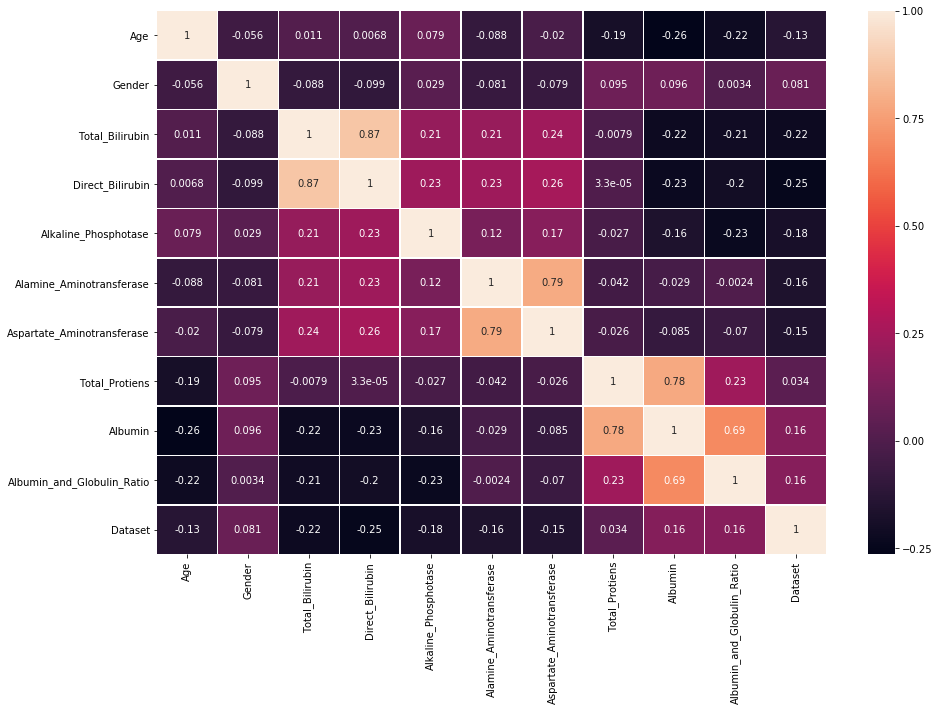

In [10]:
# draw correlation heatmap
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


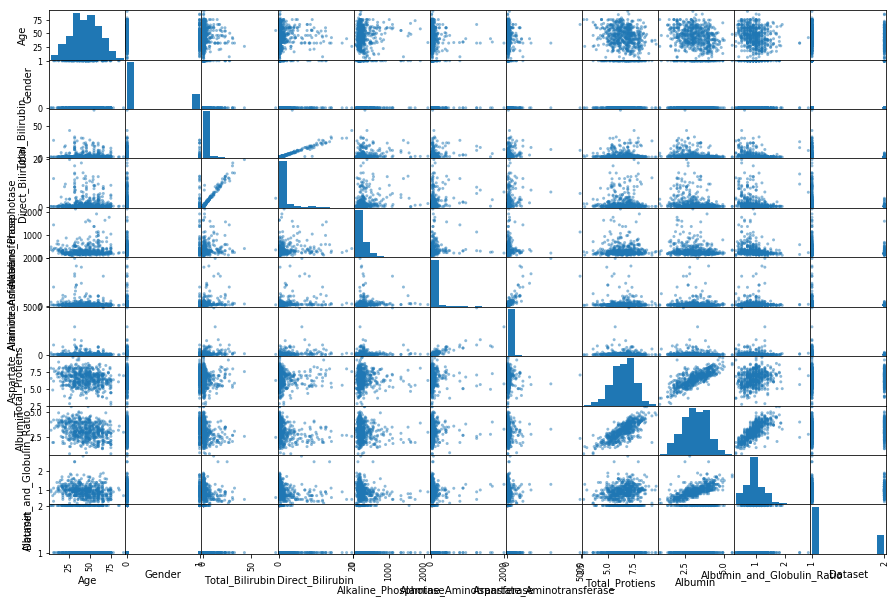

In [11]:
# draw scatter matrix of all features to see the data distribution.
pd.plotting.scatter_matrix(df, figsize=(15,10))
df = df

In [12]:
#Take all features in features variable
features = df.drop('Dataset',axis=1)
labels = df['Dataset']
features.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
def pipeline(clfs, X_train, y_train, X_test, y_test):
    accuracys = []
    for i,clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        accuracys.append((accuracy_score(y_test, preds)))
    return accuracys

In [39]:
#Create test train set
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.25, random_state=45)


In [45]:
clfs = [DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), LogisticRegression()]
headings = 'DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, LogisticRegression'
for i in range(3):
    print("\niteration #",(i+1))
    print("\n",headings)
    print("-"*len(headings))
    print(pipeline(clfs, X_train, y_train, X_test, y_test))



iteration # 1

 DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, LogisticRegression
---------------------------------------------------------------------------------
[0.7034482758620689, 0.7379310344827587, 0.7241379310344828, 0.7310344827586207]

iteration # 2

 DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, LogisticRegression
---------------------------------------------------------------------------------
[0.6758620689655173, 0.7793103448275862, 0.696551724137931, 0.7310344827586207]

iteration # 3

 DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, LogisticRegression
---------------------------------------------------------------------------------
[0.6896551724137931, 0.7310344827586207, 0.7655172413793103, 0.7310344827586207]


**We can observe the scores of each classifier respectively for 3 iterations.**